In [4]:
pip install mtcnn


Note: you may need to restart the kernel to use updated packages.


# Single Face detection and using MTCNN & visualizing through matplotlib

Shape of image/array: (234, 286, 3)


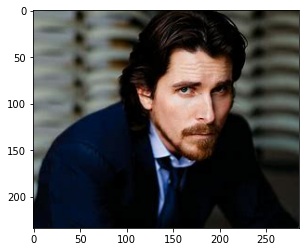

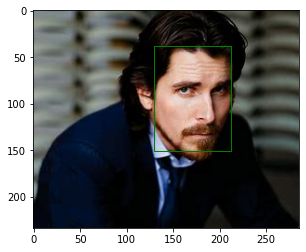

In [5]:
import mtcnn
import matplotlib.pyplot as plt

filename = "bale.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

# draw an image with detected objects
def draw_facebox(filename, result_list):
# load the image
    data = plt.imread(filename)
# plot the image
    plt.imshow(data)
# get the context for drawing boxes
    ax = plt.gca()
# plot each box
    for result in result_list:
# get coordinates
        x, y, width, height = result['box']
# create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
# draw the box
        ax.add_patch(rect)
# show the plot
        plt.show()
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

# Single Face detection using MTCNN & visualizing using OpenCV

In [6]:
from mtcnn import MTCNN
import cv2 as cv

detector = MTCNN()
img = cv.imread('bale.jpg')
output = detector.detect_faces(img)
print(output)
x,y,width,height = output[0]['box']
cv.rectangle(img,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)
cv.imshow('img',img)
cv.waitKey(0)

[{'box': [132, 45, 80, 110], 'confidence': 0.9998021721839905, 'keypoints': {'left_eye': (166, 85), 'right_eye': (203, 88), 'nose': (191, 114), 'mouth_left': (165, 131), 'mouth_right': (193, 132)}}]


-1

# Detecting Face with landmarks (eyes,nose,mouth)

In [7]:
from mtcnn import MTCNN
import cv2 as cv

detector = MTCNN()
img = cv.imread('bale.jpg')
output = detector.detect_faces(img)
print(output)
x,y,width,height = output[0]['box']

left_eyeX,left_eyeY = output[0]['keypoints']['left_eye']
right_eyeX,right_eyeY = output[0]['keypoints']['right_eye']
noseX,noseY = output[0]['keypoints']['nose']
mouth_leftX,mouth_leftY = output[0]['keypoints']['mouth_left']
mouth_rightX,mouth_rightY = output[0]['keypoints']['mouth_right']

cv.circle(img,center=(left_eyeX,left_eyeY),color=(255,0,0),thickness=3,radius=2)
cv.circle(img,center=(right_eyeX,right_eyeY),color=(255,0,0),thickness=3,radius=2)
cv.circle(img,center=(noseX,noseY),color=(255,0,0),thickness=3,radius=2)
cv.circle(img,center=(mouth_leftX,mouth_leftY),color=(255,0,0),thickness=3,radius=2)
cv.circle(img,center=(mouth_rightX,mouth_rightY),color=(255,0,0),thickness=3,radius=2)

cv.rectangle(img,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)
cv.imshow('img',img)
cv.waitKey(0)

[{'box': [132, 45, 80, 110], 'confidence': 0.9998021721839905, 'keypoints': {'left_eye': (166, 85), 'right_eye': (203, 88), 'nose': (191, 114), 'mouth_left': (165, 131), 'mouth_right': (193, 132)}}]


-1

# Detecting Multiple Faces

In [2]:
from mtcnn import MTCNN
import cv2 as cv

detector = MTCNN(weights_file='mtcnn_weights.npy',min_face_size=1,steps_threshold = [0.2, 0.2, 0.2],scale_factor=0.9)

# Parameters
# weights_file='mtcnn_weights.npy',min_face_size=1,steps_threshold = [0.2, 0.2, 0.2],scale_factor=0.9
img = cv.imread('demo2.jpg')
output = detector.detect_faces(img)

print(output)
print('Total head count: '+str(len(output)))
for i in output:
    x,y,width,height = i['box']

    left_eyeX,left_eyeY = i['keypoints']['left_eye']
    right_eyeX,right_eyeY = i['keypoints']['right_eye']
    noseX,noseY = i['keypoints']['nose']
    mouth_leftX,mouth_leftY = i['keypoints']['mouth_left']
    mouth_rightX,mouth_rightY = i['keypoints']['mouth_right']

    cv.circle(img,center=(left_eyeX,left_eyeY),color=(0,0,255),thickness=3,radius=2)
    cv.circle(img,center=(right_eyeX,right_eyeY),color=(0,0,255),thickness=3,radius=2)
    cv.circle(img,center=(noseX,noseY),color=(0,0,255),thickness=3,radius=2)
    cv.circle(img,center=(mouth_leftX,mouth_leftY),color=(0,0,255),thickness=3,radius=2)
    cv.circle(img,center=(mouth_rightX,mouth_rightY),color=(0,0,255),thickness=3,radius=2)

    cv.rectangle(img,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)
cv.imshow('img',img)
cv.waitKey(0)

[{'box': [61, 56, 15, 19], 'confidence': 0.999518632888794, 'keypoints': {'left_eye': (67, 63), 'right_eye': (74, 63), 'nose': (71, 67), 'mouth_left': (67, 70), 'mouth_right': (74, 70)}}, {'box': [268, 50, 12, 16], 'confidence': 0.9973368048667908, 'keypoints': {'left_eye': (270, 55), 'right_eye': (276, 55), 'nose': (272, 59), 'mouth_left': (270, 62), 'mouth_right': (275, 62)}}, {'box': [76, 38, 15, 18], 'confidence': 0.9927883744239807, 'keypoints': {'left_eye': (82, 46), 'right_eye': (89, 46), 'nose': (85, 50), 'mouth_left': (81, 53), 'mouth_right': (87, 53)}}, {'box': [28, 37, 14, 18], 'confidence': 0.9894531965255737, 'keypoints': {'left_eye': (33, 44), 'right_eye': (40, 45), 'nose': (38, 48), 'mouth_left': (33, 51), 'mouth_right': (39, 52)}}, {'box': [238, 37, 13, 18], 'confidence': 0.9754946231842041, 'keypoints': {'left_eye': (242, 45), 'right_eye': (249, 44), 'nose': (247, 48), 'mouth_left': (243, 52), 'mouth_right': (249, 52)}}, {'box': [214, 48, 13, 17], 'confidence': 0.83350

-1

# Detecting Face in Video

In [ ]:
import cv2 as cv
from mtcnn import MTCNN


cap = cv.VideoCapture('demo.mp4')
detector = MTCNN(weights_file='mtcnn_weights.npy',min_face_size=1,steps_threshold = [0.2, 0.2, 0.2],scale_factor=0.9)

while True:
    _,frame = cap.read()
    output = detector.detect_faces(frame)
    for i in output:
          x,y,width,height = i['box']
          cv.rectangle(frame,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)
        
    cv.imshow('win',frame)
#     print('Total head count: '+str(len(output)))
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cv.destroyAllWindows()

# Detecting Face in webcam

In [1]:
import cv2 as cv
from mtcnn import MTCNN


cap = cv.VideoCapture(0)
detector = MTCNN()

while True:
    _,frame = cap.read()
    output = detector.detect_faces(frame)
    for i in output:
          x,y,width,height = i['box']
          cv.rectangle(frame,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)
        
    cv.imshow('win',frame)
#     print('Total head count: '+str(len(output)))
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cv.destroyAllWindows()

In [ ]:
# from facenet_pytorch import MTCNN
# import cv2
# # from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
# # from tqdm.notebook import tqdm

# # Create face detector
# mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

# # Load a single image and display
# v_cap = cv2.VideoCapture('demo.mp4')
# success, frame = v_cap.read()
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# frame = Image.fromarray(frame)

# plt.figure(figsize=(12, 8))
# plt.imshow(frame)
# plt.axis('off')
# plt.show()

# # Detect face
# faces = mtcnn(frame)

# # Visualize
# fig, axes = plt.subplots(1, len(faces))
# for face, ax in zip(faces, axes):
#     ax.imshow(face.permute(1, 2, 0).int().numpy())
#     ax.axis('off')
# fig.show()


In [ ]:
# pip install facenet-pytorch

In [3]:
help(MTCNN())

NameError: name 'MTCNN' is not defined

In [ ]:
# https://youtu.be/DlGyHcGuE6c   